Found 2219 images belonging to 2 classes.
Found 554 images belonging to 2 classes.
Epoch 1/10


C:\Program Files\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 383s 5s/step - accuracy: 0.7197 - loss: 1.5187 - val_accuracy: 0.8628 - val_loss: 0.3025
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 396s 6s/step - accuracy: 0.8746 - loss: 0.3065 - val_accuracy: 0.7924 - val_loss: 0.4257
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 445s 6s/step - accuracy: 0.8911 - loss: 0.2594 - val_accuracy: 0.8556 - val_loss: 0.2970
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 655s 9s/step - accuracy: 0.9160 - loss: 0.2261 - val_accuracy: 0.8881 - val_loss: 0.2650
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 653s 9s/step - accuracy: 0.9370 - loss: 0.1721 - val_accuracy: 0.8845 - val_loss: 0.2641
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 633s 9s/step - accuracy: 0.9294 - loss: 0.1720 - val_accuracy: 0.8845 - val_loss: 0.2749
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 634s 9s/step - accuracy: 0.9415 - loss: 0.1663 - val_accuracy: 0.8863 - val_loss: 0.2702
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 632s 9s/step - accuracy: 0.9525 - loss: 0.1508 - val_accuracy: 0.8971 - val_loss: 0.

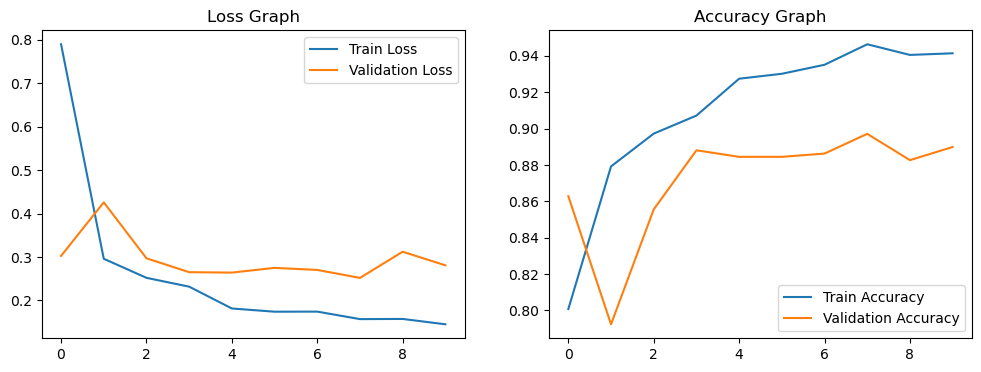

18/18 ━━━━━━━━━━━━━━━━━━━━ 122s 7s/step
               precision    recall  f1-score   support

    landslide       0.30      0.34      0.32       154
non-landslide       0.73      0.70      0.72       400

     accuracy                           0.60       554
    macro avg       0.52      0.52      0.52       554
 weighted avg       0.61      0.60      0.61       554



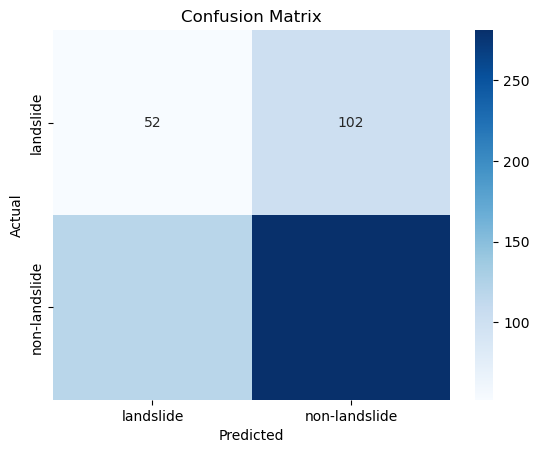

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess dataset
data_dir = "D:/March/Landside/dataset"  # Change to your dataset path
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load Pretrained VGG19 Model
base_model = applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

# Define Model
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Plot Loss and Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Graph')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Graph')
plt.show()

# Evaluate Model
y_true = validation_generator.classes
y_pred = np.argmax(model.predict(validation_generator), axis=1)
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [4]:
model.save('landslide_model.keras')